# Data Science Programming Assignment
Submitted by Prathima Venkatesan
STUDENT ID: 210281202

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit

## 1) Summary
This report gives a descriptive data of protein sequences mainly focussing on their biological properties such as calculating shannon entropy and the number of atoms for different sequences.Two original datasets have been provided where further analysis has been done based on experimental factors.


## 2) Problem Definition
Two datasets Sp_Epitopes and proteins have been provided.These datasets consist ofexisting proteomic sequences and R package epitopes.Specific requirements have been given which have been analyzed and developed.

## 3) Main

### M1
#### A short summary of the dataset

In [2]:
import pandas as pd
dataset1 = pd.read_csv("proteins.csv")
dataset1.head()

,TSeq_seqtype,TSeq_accver,TSeq_taxid,TSeq_orgname,TSeq_defline,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid
0,protein,0704243A,11320,Influenza A virus,hemagglutinin HA1,328,EYLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSS...,0704243A,NCBI protein,NaN
1,protein,P06914.1,73239,Plasmodium yoelii yoelii,RecName: Full=Circumsporozoite protein; Short=...,367,MKKCTILVVASLLLVDSLLPGYGQNKSVQAQRNLNELCYNEENDNK...,P06914.1,NCBI protein,NaN
2,protein,P03449.2,383586,Influenza A virus (A/Memphis/1/1971(H3N2)),RecName: Full=Hemagglutinin; Contains: RecName...,566,MKTIIALSHIFCLVLGQYLPGNDNSTATLCLGHHAVPNGTLVKTIT...,P03449.2,NCBI protein,NaN
3,protein,P04664.1,387147,Influenza A virus (A/England/878/1969(H3N2)),RecName: Full=Hemagglutinin; Contains: RecName...,328,QDLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSS...,P04664.1,NCBI protein,NaN
4,protein,ABF83447.1,370128,Influenza A virus (A/Northern Territory/60/196...,hemagglutinin [Influenza A virus (A/Northern T...,566,MKTIIALSYIFCLALGQDLPGNDNNTATLCLGHHAVPNGTLVKTIT...,ABF83447.1,NCBI protein,gnl|NIGSP|NIGSP-BK-00018.HAp1


In [3]:
dataset1.shape

(14194, 10)

In [4]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14194 entries, 0 to 14193
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TSeq_seqtype   14194 non-null  object
 1   TSeq_accver    13985 non-null  object
 2   TSeq_taxid     14194 non-null  int64 
 3   TSeq_orgname   14194 non-null  object
 4   TSeq_defline   14194 non-null  object
 5   TSeq_length    14194 non-null  int64 
 6   TSeq_sequence  14194 non-null  object
 7   UID            14194 non-null  object
 8   DB             14194 non-null  object
 9   TSeq_sid       1236 non-null   object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


In [5]:
import pandas as pd
dataset2 = pd.read_csv("Sp_epitopes.csv")
dataset2.head()

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,end_pos,n_assays,host_id,bcell_id,assay_type,n_Positive,n_Negative,assay_class
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,49,2,"96,069,606","16,746,431,674,584","34,34",2,0,"1,1"
1,26911649,2016,spy0469 P197,510898,Representative selection,Epitope containing region/antigenic site,1314,AAfK33481.1,AETTEVEPKTDISEA,197,211,1,9606,2728090,550,0,1,-1
2,26911649,2016,spy0469 P14,511327,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ALSLVPLATAQAQEW,14,28,1,9606,2727907,550,0,1,-1
3,26911649,2016,spy0469 P91,511425,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ANYNQHGQATNLTVQ,91,105,1,9606,2727984,550,0,1,-1
4,26911649,2016,spy0469 P137,511599,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,AP453PATPSDVPTTPFA,137,151,1,9606,2728030,550,0,1,-1


In [6]:
dataset2.shape

(7105, 18)

In [7]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pubmed_id       7105 non-null   int64 
 1   year            7105 non-null   int64 
 2   epit_name       7105 non-null   object
 3   epitope_id      7105 non-null   int64 
 4   evid_code       7104 non-null   object
 5   epit_struc_def  7105 non-null   object
 6   sourceOrg_id    7105 non-null   int64 
 7   protein_id      7105 non-null   object
 8   epit_seq        7105 non-null   object
 9   start_pos       7105 non-null   int64 
 10  end_pos         7105 non-null   int64 
 11  n_assays        7105 non-null   int64 
 12  host_id         7105 non-null   object
 13  bcell_id        7105 non-null   object
 14  assay_type      7105 non-null   object
 15  n_Positive      7105 non-null   int64 
 16  n_Negative      7105 non-null   int64 
 17  assay_class     7105 non-null   object
dtypes: int64

In M1,I have shown a brief summary of both datasets provided by using head,shape and info function.

### M2
#### Adequately join the protein sequences onto the epitopes table

In [8]:
output1 = pd.merge(dataset2, dataset1,left_on='protein_id', right_on='UID')
output1

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,...,TSeq_seqtype,TSeq_accver,TSeq_taxid,TSeq_orgname,TSeq_defline,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,protein,AAB20743.1,1314,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592
1,26911649,2016,spy0469 P14,511327,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ALSLVPLATAQAQEW,14,...,protein,AAK33481.1,160490,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469
2,26911649,2016,spy0469 P91,511425,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ANYNQHGQATNLTVQ,91,...,protein,AAK33481.1,160490,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469
3,26911649,2016,spy0469 P137,511599,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,AP453PATPSDVPTTPFA,137,...,protein,AAK33481.1,160490,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469
4,26911649,2016,spy0469 P211,511701,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,APTSANRPVPNESAS,211,...,protein,AAK33481.1,160490,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,26911649,2016,spy1361 P115,523623,Representative selection,Epitope containing region/antigenic site,1314,WP_053308449.1,PKGASLAKPAVAQRA,116,...,protein,WP_053308449.1,1314,Streptococcus pyogenes,leucine-rich repeat domain-containing protein ...,792,MKTKKVIILVGLLLSSQLTLIACQSRGNGTYPIKTKQSRKGMTSNK...,WP_053308449.1,NCBI protein,NaN
7096,26911649,2016,spy1361 P127,524458,Representative selection,Epitope containing region/antigenic site,1314,WP_053308449.1,QRAASQGTSKVADPH,128,...,protein,WP_053308449.1,1314,Streptococcus pyogenes,leucine-rich repeat domain-containing protein ...,792,MKTKKVIILVGLLLSSQLTLIACQSRGNGTYPIKTKQSRKGMTSNK...,WP_053308449.1,NCBI protein,NaN
7097,26911649,2016,spy1361 P119,526198,Representative selection,Epitope containing region/antigenic site,1314,WP_053308449.1,SLAKPAVAQRAASQG,120,...,protein,WP_053308449.1,1314,Streptococcus pyogenes,leucine-rich repeat domain-containing protein ...,792,MKTKKVIILVGLLLSSQLTLIACQSRGNGTYPIKTKQSRKGMTSNK...,WP_053308449.1,NCBI protein,NaN
7098,26911649,2016,spy1361 P125,528426,Representative selection,Epitope containing region/antigenic site,1314,WP_053308449.1,VAQRAASQGTSKVAD,126,...,protein,WP_053308449.1,1314,Streptococcus pyogenes,leucine-rich repeat domain-containing protein ...,792,MKTKKVIILVGLLLSSQLTLIACQSRGNGTYPIKTKQSRKGMTSNK...,WP_053308449.1,NCBI protein,NaN


Here we have joined both datasets based on the related variable pair protein_id & UID using right join.

## M3
### Remove invalid observations

#### (i) those without corresponding protein sequences

In [9]:
output1.shape

(7100, 28)

By using right join in the previous task we have eliminated the invalid protein sequences

#### (ii) those for which the epitope substring is not located in the correct position of the protein string (based on start_pos and end_pos)

In [10]:
d=[]
for i in range(output1.shape[0]):
      if output1['TSeq_sequence'][i][output1['start_pos'][i]-1:output1['end_pos'][i]]!=output1['epit_seq'][i]:
            d.append(i)

In [11]:
output1.drop(d,inplace=True)

In [12]:
output1.shape

(7094, 28)

In [13]:
output1.columns

Index(['pubmed_id', 'year', 'epit_name', 'epitope_id', 'evid_code',
       'epit_struc_def', 'sourceOrg_id', 'protein_id', 'epit_seq', 'start_pos',
       'end_pos', 'n_assays', 'host_id', 'bcell_id', 'assay_type',
       'n_Positive', 'n_Negative', 'assay_class', 'TSeq_seqtype',
       'TSeq_accver', 'TSeq_taxid', 'TSeq_orgname', 'TSeq_defline',
       'TSeq_length', 'TSeq_sequence', 'UID', 'DB', 'TSeq_sid'],
      dtype='object')

In [14]:
df=output1

In [15]:
df

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,...,TSeq_seqtype,TSeq_accver,TSeq_taxid,TSeq_orgname,TSeq_defline,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,protein,AAB20743.1,1314,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592
1,26911649,2016,spy0469 P14,511327,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ALSLVPLATAQAQEW,14,...,protein,AAK33481.1,160490,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469
2,26911649,2016,spy0469 P91,511425,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ANYNQHGQATNLTVQ,91,...,protein,AAK33481.1,160490,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469
4,26911649,2016,spy0469 P211,511701,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,APTSANRPVPNESAS,211,...,protein,AAK33481.1,160490,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469
5,26911649,2016,spy0469 P126,512004,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ASATSQPTVPMAPPA,126,...,protein,AAK33481.1,160490,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,26911649,2016,spy1361 P115,523623,Representative selection,Epitope containing region/antigenic site,1314,WP_053308449.1,PKGASLAKPAVAQRA,116,...,protein,WP_053308449.1,1314,Streptococcus pyogenes,leucine-rich repeat domain-containing protein ...,792,MKTKKVIILVGLLLSSQLTLIACQSRGNGTYPIKTKQSRKGMTSNK...,WP_053308449.1,NCBI protein,NaN
7096,26911649,2016,spy1361 P127,524458,Representative selection,Epitope containing region/antigenic site,1314,WP_053308449.1,QRAASQGTSKVADPH,128,...,protein,WP_053308449.1,1314,Streptococcus pyogenes,leucine-rich repeat domain-containing protein ...,792,MKTKKVIILVGLLLSSQLTLIACQSRGNGTYPIKTKQSRKGMTSNK...,WP_053308449.1,NCBI protein,NaN
7097,26911649,2016,spy1361 P119,526198,Representative selection,Epitope containing region/antigenic site,1314,WP_053308449.1,SLAKPAVAQRAASQG,120,...,protein,WP_053308449.1,1314,Streptococcus pyogenes,leucine-rich repeat domain-containing protein ...,792,MKTKKVIILVGLLLSSQLTLIACQSRGNGTYPIKTKQSRKGMTSNK...,WP_053308449.1,NCBI protein,NaN
7098,26911649,2016,spy1361 P125,528426,Representative selection,Epitope containing region/antigenic site,1314,WP_053308449.1,VAQRAASQGTSKVAD,126,...,protein,WP_053308449.1,1314,Streptococcus pyogenes,leucine-rich repeat domain-containing protein ...,792,MKTKKVIILVGLLLSSQLTLIACQSRGNGTYPIKTKQSRKGMTSNK...,WP_053308449.1,NCBI protein,NaN


In [16]:
data= df.reset_index().drop(columns='index')

In [17]:
df['TSeq_length'][0]

414

The epitope sequences that are not located in the correct position are dropped by checking the start_pos and end_pos of each protein_id

#### (iii) those with start_pos < 8 or with end_pos > (TSeq_length – 8)

In [18]:
df.drop(df[df['start_pos']<8].index, inplace = True)

In [19]:
df.shape

(6966, 28)

In [20]:
df.drop(df[df['end_pos']>df['TSeq_length']-8].index, inplace=True)

In [21]:
df.shape

(6826, 28)

Protein_id's that have start_pos less than 8 and end_pos greater than (TSeq_length – 8) have been dropped.

#### (iv) those containing any non-specific aminoacid letters (namely B,J,X or Z) in the epitope sequence.

In [22]:
df.to_excel('py.xlsx')

In [23]:
df[df['epit_seq'].str.contains('B')]['epit_seq'].sum()

0

In [24]:
df[df['epit_seq'].str.contains('J')]['epit_seq'].sum()

0

In [25]:
df[df['epit_seq'].str.contains('X')]['epit_seq'].sum()

0

In [26]:
df[df['epit_seq'].str.contains('Z')]['epit_seq'].sum()

0

In [27]:
df.shape

(6826, 28)

The above code shows that the data retrieved does not contain any epitope sequences that have any non-specific aminoacid letters (namely B,J,X or Z)
The shape of the dataframe attained is (6826,28).

## M4
#### Calculate the Class attribute for this data set based on the number of positive and negative assays (if n_Positive >= n_Negative then Class = 1, otherwise Class = 0)

In [28]:
df['Class'] = np.where(df['n_Positive']>=df['n_Negative'],1,0)

By using 'where' function the data has been classified on the basis of the sign of the number of assays(n_Positive & n_Negative )  into two distinct classes having values 1 & 0.If n_Positive >= n_Negative,the data is assigned to Class=1 otherwise its Class=0.

## M5
### Develop high-quality visualisations of the main characteristics of the resulting joined data set. The minimal requirement here is:

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

#### (i) a graphical investigation of Class balance;

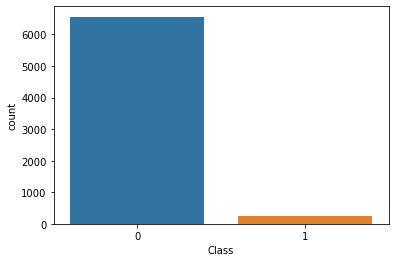

In [30]:
import warnings
ax=sns.countplot(x='Class',data=df)

A graphical investigation using countplot depicts the differences in the classes of the dataframe

#### (ii) a graphical investigation of the distribution of epitope lengths;

In [31]:
df['epit_name'].value_counts()

SK (42-49)                           1
spy1801 P382                         1
spy1801 P381                         1
spy1801 P379                         1
spy1801 P146                         1
                                    ..
spy0019 P322                         1
spy0019 P311                         1
spy0019 P344                         1
spy0019 P130                         1
S pyogenes RNA polymerase 297-309    1
Name: epit_name, Length: 6826, dtype: int64

In [32]:
df['epit_name'].str.len()

0       10
1       11
2       11
4       12
5       12
        ..
7095    12
7096    12
7097    12
7098    12
7099    33
Name: epit_name, Length: 6826, dtype: int64

<Figure size 2160x1440 with 0 Axes>

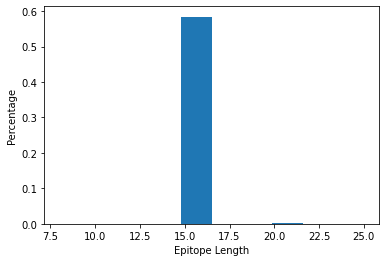

<Figure size 2160x1440 with 0 Axes>

In [33]:
plt.hist(df['epit_seq'].str.len(), density=True)
plt.xlabel('Epitope Length')
plt.ylabel('Percentage')
plt.figure(figsize=(30,20))

The graphical investigation attained above shows that all of the epitope sequences have the distribution of lengths in the range of 15.

#### (iii) A grouped bar chart of the frequencies (%) of each aminoacid letter in Positive vs Negative observations.

In [34]:
negative_data= df[df['Class']==0].reset_index().drop(columns='index')
positive_data= df[df['Class']==1].reset_index().drop(columns='index')

In [35]:
list(negative_data['epit_seq'])

['ALSLVPLATAQAQEW',
 'ANYNQHGQATNLTVQ',
 'APTSANRPVPNESAS',
 'ASATSQPTVPMAPPA',
 'ATNLTVQAPASSPAS',
 'ATSQPTVPMAPPATP',
 'DISEAPTSANRPVPN',
 'EAPTSANRPVPNESA',
 'EPKTDISEAPTSANR',
 'ETTEVEPKTDISEAP',
 'EVEPKTDISEAPTSA',
 'FVTSVALSLVPLATA',
 'GQATNLTVQAPASSP',
 'HGQATNLTVQAPASS',
 'ILTANYNQHGQATNL',
 'ISEAPTSANRPVPNE',
 'LFVTSVALSLVPLAT',
 'LSLVPLATAQAQEWT',
 'LTANYNQHGQATNLT',
 'LVPLATAQAQEWTPR',
 'MAPPATPSDVPTTPF',
 'NLTVQAPASSPASVS',
 'NQHGQATNLTVQAPA',
 'NYNQHGQATNLTVQA',
 'PATPSDVPTTPFASA',
 'PKTDISEAPTSANRP',
 'PMAPPATPSDVPTTP',
 'PPATPSDVPTTPFAS',
 'PTVPMAPPATPSDVP',
 'QASATSQPTVPMAPP',
 'QATNLTVQAPASSPA',
 'QHGQATNLTVQAPAS',
 'QPTVPMAPPATPSDV',
 'SATSQPTVPMAPPAT',
 'SEAPTSANRPVPNES',
 'SLVPLATAQAQEWTP',
 'SQPTVPMAPPATPSD',
 'SVALSLVPLATAQAQ',
 'TANYNQHGQATNLTV',
 'TDISEAPTSANRPVP',
 'TEVEPKTDISEAPTS',
 'TILTANYNQHGQATN',
 'TNLTVQAPASSPASV',
 'TSQPTVPMAPPATPS',
 'TSVALSLVPLATAQA',
 'TTEVEPKTDISEAPT',
 'TVPMAPPATPSDVPT',
 'VALSLVPLATAQAQE',
 'VEPKTDISEAPTSAN',
 'VPLATAQAQEWTPRS',


In [36]:
negative_ami_list=[]
for i in range(negative_data.shape[0]):
    negative_ami_list.extend(list(negative_data['epit_seq'][i]))

In [37]:
positive_ami_list=[]
for i in range(positive_data.shape[0]):
    positive_ami_list.extend(list(positive_data['epit_seq'][i]))

In [38]:
from collections import Counter
df2= pd.DataFrame([dict(Counter(negative_ami_list)), dict(Counter(positive_ami_list))])

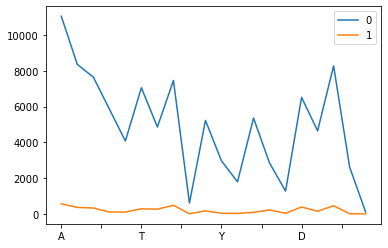

<Figure size 1440x1440 with 0 Axes>

In [39]:
df2= df2.fillna(int(0)).astype('int64')
df2= df2.transpose()
df2.plot(kind='line', stacked=False)
plt.figure(figsize=(20,20))
plt.show()

The distribution in aminoacid letters having a positive or negative observation using barplot has been developed.This visualisation shows us that most of the epitope sequences have been classified to Class o which means that most of the data has more number of negative assays. 

#### M6
#### Based on the resulting data set of (M1)-(M4), assemble an expanded data set, such that each aminoacid of each epitope sequence is represented in an individual row. This expanded data set must have a new variable called AA_window , containing a substring of length 15 centred on the specific aminoacid. 

#### See Figure 1 below for details.

#### Report the dimension of the data after each step.

In [40]:
df

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,...,TSeq_accver,TSeq_taxid,TSeq_orgname,TSeq_defline,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid,Class
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,AAB20743.1,1314,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1
1,26911649,2016,spy0469 P14,511327,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ALSLVPLATAQAQEW,14,...,AAK33481.1,160490,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,0
2,26911649,2016,spy0469 P91,511425,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ANYNQHGQATNLTVQ,91,...,AAK33481.1,160490,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,0
4,26911649,2016,spy0469 P211,511701,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,APTSANRPVPNESAS,211,...,AAK33481.1,160490,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,0
5,26911649,2016,spy0469 P126,512004,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ASATSQPTVPMAPPA,126,...,AAK33481.1,160490,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,26911649,2016,spy1361 P115,523623,Representative selection,Epitope containing region/antigenic site,1314,WP_053308449.1,PKGASLAKPAVAQRA,116,...,WP_053308449.1,1314,Streptococcus pyogenes,leucine-rich repeat domain-containing protein ...,792,MKTKKVIILVGLLLSSQLTLIACQSRGNGTYPIKTKQSRKGMTSNK...,WP_053308449.1,NCBI protein,NaN,0
7096,26911649,2016,spy1361 P127,524458,Representative selection,Epitope containing region/antigenic site,1314,WP_053308449.1,QRAASQGTSKVADPH,128,...,WP_053308449.1,1314,Streptococcus pyogenes,leucine-rich repeat domain-containing protein ...,792,MKTKKVIILVGLLLSSQLTLIACQSRGNGTYPIKTKQSRKGMTSNK...,WP_053308449.1,NCBI protein,NaN,0
7097,26911649,2016,spy1361 P119,526198,Representative selection,Epitope containing region/antigenic site,1314,WP_053308449.1,SLAKPAVAQRAASQG,120,...,WP_053308449.1,1314,Streptococcus pyogenes,leucine-rich repeat domain-containing protein ...,792,MKTKKVIILVGLLLSSQLTLIACQSRGNGTYPIKTKQSRKGMTSNK...,WP_053308449.1,NCBI protein,NaN,0
7098,26911649,2016,spy1361 P125,528426,Representative selection,Epitope containing region/antigenic site,1314,WP_053308449.1,VAQRAASQGTSKVAD,126,...,WP_053308449.1,1314,Streptococcus pyogenes,leucine-rich repeat domain-containing protein ...,792,MKTKKVIILVGLLLSSQLTLIACQSRGNGTYPIKTKQSRKGMTSNK...,WP_053308449.1,NCBI protein,NaN,0


In [41]:
df['epit_length']=df.end_pos-df.start_pos+1

In [42]:
df.filter(['start_pos','end_pos','epit_length'], axis=1)

,start_pos,end_pos,epit_length
0,42,49,8
1,14,28,15
2,91,105,15
4,211,225,15
5,126,140,15
...,...,...,...
7095,116,130,15
7096,128,142,15
7097,120,134,15
7098,126,140,15


In [43]:
rep=df.loc[df.index.repeat(df.epit_length)]

In [44]:
rep[['start_pos','end_pos','epit_length','TSeq_sequence']].head(10)

,start_pos,end_pos,epit_length,TSeq_sequence
0,42,49,8,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...
0,42,49,8,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...
0,42,49,8,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...
0,42,49,8,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...
0,42,49,8,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...
0,42,49,8,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...
0,42,49,8,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...
0,42,49,8,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...
1,14,28,15,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...
1,14,28,15,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...


In [45]:
rep.shape

(102659, 30)

In [46]:
new_list=[]
for i in df.index:
    a=df.start_pos[i]
    b=df.end_pos[i]
    new_list.append(a)
    while a<b:
        new_list.append(a+1)
        a=a+1 

In [47]:
rep['AA_position']=new_list

In [48]:
rep

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,...,TSeq_orgname,TSeq_defline,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid,Class,epit_length,AA_position
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,42
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,43
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,44
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,45
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7099,31787984,2019,S pyogenes RNA polymerase 297-309,956369,NaN,Epitope containing region/antigenic site,1314,WP_136048133.1,IDNGRRGRPITGP,297,...,Streptococcus pyogenes,DNA-directed RNA polymerase subunit beta' [Str...,1219,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,WP_136048133.1,NCBI protein,NaN,1,13,305
7099,31787984,2019,S pyogenes RNA polymerase 297-309,956369,NaN,Epitope containing region/antigenic site,1314,WP_136048133.1,IDNGRRGRPITGP,297,...,Streptococcus pyogenes,DNA-directed RNA polymerase subunit beta' [Str...,1219,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,WP_136048133.1,NCBI protein,NaN,1,13,306
7099,31787984,2019,S pyogenes RNA polymerase 297-309,956369,NaN,Epitope containing region/antigenic site,1314,WP_136048133.1,IDNGRRGRPITGP,297,...,Streptococcus pyogenes,DNA-directed RNA polymerase subunit beta' [Str...,1219,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,WP_136048133.1,NCBI protein,NaN,1,13,307
7099,31787984,2019,S pyogenes RNA polymerase 297-309,956369,NaN,Epitope containing region/antigenic site,1314,WP_136048133.1,IDNGRRGRPITGP,297,...,Streptococcus pyogenes,DNA-directed RNA polymerase subunit beta' [Str...,1219,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,WP_136048133.1,NCBI protein,NaN,1,13,308


In [49]:
rep['new_start_pos'] = rep.apply(
    lambda row:row.AA_position-7, axis=1)
rep['new_end_pos'] = rep.apply(
    lambda row:row.AA_position+7, axis=1)

In [50]:
rep

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,...,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid,Class,epit_length,AA_position,new_start_pos,new_end_pos
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,42,35,49
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,43,36,50
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,44,37,51
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,45,38,52
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,46,39,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7099,31787984,2019,S pyogenes RNA polymerase 297-309,956369,NaN,Epitope containing region/antigenic site,1314,WP_136048133.1,IDNGRRGRPITGP,297,...,1219,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,WP_136048133.1,NCBI protein,NaN,1,13,305,298,312
7099,31787984,2019,S pyogenes RNA polymerase 297-309,956369,NaN,Epitope containing region/antigenic site,1314,WP_136048133.1,IDNGRRGRPITGP,297,...,1219,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,WP_136048133.1,NCBI protein,NaN,1,13,306,299,313
7099,31787984,2019,S pyogenes RNA polymerase 297-309,956369,NaN,Epitope containing region/antigenic site,1314,WP_136048133.1,IDNGRRGRPITGP,297,...,1219,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,WP_136048133.1,NCBI protein,NaN,1,13,307,300,314
7099,31787984,2019,S pyogenes RNA polymerase 297-309,956369,NaN,Epitope containing region/antigenic site,1314,WP_136048133.1,IDNGRRGRPITGP,297,...,1219,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,WP_136048133.1,NCBI protein,NaN,1,13,308,301,315


In [51]:
rep.filter(['start_pos','end_pos','epit_length','AA_position','TSeq_sequence','new_start_pos','new_end_pos'], axis=1)

,start_pos,end_pos,epit_length,AA_position,TSeq_sequence,new_start_pos,new_end_pos
0,42,49,8,42,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,35,49
0,42,49,8,43,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,36,50
0,42,49,8,44,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,37,51
0,42,49,8,45,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,38,52
0,42,49,8,46,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,39,53
...,...,...,...,...,...,...,...
7099,297,309,13,305,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,298,312
7099,297,309,13,306,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,299,313
7099,297,309,13,307,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,300,314
7099,297,309,13,308,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,301,315


In [52]:
rep = rep.reset_index(drop = True)

In [53]:
rep.head(5)

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,...,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid,Class,epit_length,AA_position,new_start_pos,new_end_pos
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,42,35,49
1,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,43,36,50
2,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,44,37,51
3,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,45,38,52
4,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,414,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,46,39,53


In [54]:
new_list1=[]
for i in rep.index:
    a=rep.new_start_pos[i]
    b=rep.new_end_pos[i]
    c=rep.TSeq_sequence[i]
    new_list1.append(c[a-1:b])

In [55]:
rep['AA_window']=new_list1

In [56]:
rep

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,...,TSeq_sequence,UID,DB,TSeq_sid,Class,epit_length,AA_position,new_start_pos,new_end_pos,AA_window
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,42,35,49,LKFFEIDLTSRPAHG
1,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,43,36,50,KFFEIDLTSRPAHGG
2,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,44,37,51,FFEIDLTSRPAHGGK
3,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,45,38,52,FEIDLTSRPAHGGKT
4,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8,46,39,53,EIDLTSRPAHGGKTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102654,31787984,2019,S pyogenes RNA polymerase 297-309,956369,NaN,Epitope containing region/antigenic site,1314,WP_136048133.1,IDNGRRGRPITGP,297,...,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,WP_136048133.1,NCBI protein,NaN,1,13,305,298,312,DNGRRGRPITGPGSR
102655,31787984,2019,S pyogenes RNA polymerase 297-309,956369,NaN,Epitope containing region/antigenic site,1314,WP_136048133.1,IDNGRRGRPITGP,297,...,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,WP_136048133.1,NCBI protein,NaN,1,13,306,299,313,NGRRGRPITGPGSRP
102656,31787984,2019,S pyogenes RNA polymerase 297-309,956369,NaN,Epitope containing region/antigenic site,1314,WP_136048133.1,IDNGRRGRPITGP,297,...,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,WP_136048133.1,NCBI protein,NaN,1,13,307,300,314,GRRGRPITGPGSRPL
102657,31787984,2019,S pyogenes RNA polymerase 297-309,956369,NaN,Epitope containing region/antigenic site,1314,WP_136048133.1,IDNGRRGRPITGP,297,...,MVDVNRFKSMQITLASPSKVRSWSYGEVKKPETINYRTLKPEREGL...,WP_136048133.1,NCBI protein,NaN,1,13,308,301,315,RRGRPITGPGSRPLK


In [57]:
epitopes_proteins_expanded_df=rep[['protein_id','epitope_id','AA_position','AA_window','Class']]

In [58]:
epitopes_proteins_expanded_df

,protein_id,epitope_id,AA_position,AA_window,Class
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1
...,...,...,...,...,...
102654,WP_136048133.1,956369,305,DNGRRGRPITGPGSR,1
102655,WP_136048133.1,956369,306,NGRRGRPITGPGSRP,1
102656,WP_136048133.1,956369,307,GRRGRPITGPGSRPL,1
102657,WP_136048133.1,956369,308,RRGRPITGPGSRPLK,1


A new expanded data 'epitopes_proteins_expanded_df'has been created including a newly added column called 'AA_Window'.By using lamba function the epitope sequences have been obtained seperately for AA_Window.

# S1
#### Report the class imbalance of the expanded data set. To deal with this class imbalance you must keep all ‘positive class’ observations and class imbalance you must keep all ‘positive class’ observations and randomly select 1.5*num_positive number of ‘negative class’ observations from the expanded data set; where num_positive is the number of positive observations.
#### Report the dimension of the data after each step.

In [59]:
positive_class=epitopes_proteins_expanded_df[(epitopes_proteins_expanded_df["Class"]==1)]

In [60]:
positive_class.head()

,protein_id,epitope_id,AA_position,AA_window,Class
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1


In [61]:
positive_class.sum()

protein_id     AAB20743.1AAB20743.1AAB20743.1AAB20743.1AAB207...
epitope_id                                            1882104860
AA_position                                               776495
AA_window      LKFFEIDLTSRPAHGKFFEIDLTSRPAHGGFFEIDLTSRPAHGGKF...
Class                                                       4100
dtype: object

In [62]:
a=positive_class.shape

In [63]:
a[0]*1.5

6150.0

In [64]:
negative_class=epitopes_proteins_expanded_df[(epitopes_proteins_expanded_df["Class"]==0)]

In [65]:
negative_class.head()

,protein_id,epitope_id,AA_position,AA_window,Class
8,AAK33481.1,511327,14,SLFVTSVALSLVPLA,0
9,AAK33481.1,511327,15,LFVTSVALSLVPLAT,0
10,AAK33481.1,511327,16,FVTSVALSLVPLATA,0
11,AAK33481.1,511327,17,VTSVALSLVPLATAQ,0
12,AAK33481.1,511327,18,TSVALSLVPLATAQA,0


In [66]:
b=negative_class.shape

In [67]:
negative_class.shape

(98559, 5)

In [68]:
negative_class=negative_class.sample(n=6150)

In [69]:
negative_class.shape

(6150, 5)

A positive class and negative class dataframe has been created seperately based upom the 'Class' having only value as 1 or 0 respectively.Random values of positive class have been multiplied with 1.5 where we get 6150.The common number of rows between both the classes have been sampled allowing negative class to have the same number of rows(6150).

# S2
#### Calculation of features related to the letters in the AA_window sequences calculated in (M5):
#### ->20 features for the relative frequency of each individual letter

In [70]:
epitopes_proteins_expanded_df['AA_window']

0         LKFFEIDLTSRPAHG
1         KFFEIDLTSRPAHGG
2         FFEIDLTSRPAHGGK
3         FEIDLTSRPAHGGKT
4         EIDLTSRPAHGGKTE
               ...       
102654    DNGRRGRPITGPGSR
102655    NGRRGRPITGPGSRP
102656    GRRGRPITGPGSRPL
102657    RRGRPITGPGSRPLK
102658    RGRPITGPGSRPLKS
Name: AA_window, Length: 102659, dtype: object

In [71]:
list_a=[]
for i in range(epitopes_proteins_expanded_df.shape[0]):
    list_a.extend(list(epitopes_proteins_expanded_df['AA_window'][i]))

In [72]:
list_a

['L',
 'K',
 'F',
 'F',
 'E',
 'I',
 'D',
 'L',
 'T',
 'S',
 'R',
 'P',
 'A',
 'H',
 'G',
 'K',
 'F',
 'F',
 'E',
 'I',
 'D',
 'L',
 'T',
 'S',
 'R',
 'P',
 'A',
 'H',
 'G',
 'G',
 'F',
 'F',
 'E',
 'I',
 'D',
 'L',
 'T',
 'S',
 'R',
 'P',
 'A',
 'H',
 'G',
 'G',
 'K',
 'F',
 'E',
 'I',
 'D',
 'L',
 'T',
 'S',
 'R',
 'P',
 'A',
 'H',
 'G',
 'G',
 'K',
 'T',
 'E',
 'I',
 'D',
 'L',
 'T',
 'S',
 'R',
 'P',
 'A',
 'H',
 'G',
 'G',
 'K',
 'T',
 'E',
 'I',
 'D',
 'L',
 'T',
 'S',
 'R',
 'P',
 'A',
 'H',
 'G',
 'G',
 'K',
 'T',
 'E',
 'Q',
 'D',
 'L',
 'T',
 'S',
 'R',
 'P',
 'A',
 'H',
 'G',
 'G',
 'K',
 'T',
 'E',
 'Q',
 'G',
 'L',
 'T',
 'S',
 'R',
 'P',
 'A',
 'H',
 'G',
 'G',
 'K',
 'T',
 'E',
 'Q',
 'G',
 'L',
 'S',
 'L',
 'F',
 'V',
 'T',
 'S',
 'V',
 'A',
 'L',
 'S',
 'L',
 'V',
 'P',
 'L',
 'A',
 'L',
 'F',
 'V',
 'T',
 'S',
 'V',
 'A',
 'L',
 'S',
 'L',
 'V',
 'P',
 'L',
 'A',
 'T',
 'F',
 'V',
 'T',
 'S',
 'V',
 'A',
 'L',
 'S',
 'L',
 'V',
 'P',
 'L',
 'A',
 'T',
 'A',
 'V',
 'T'

In [73]:
list_b=list(set(list_a))

In [74]:
list_b

['T',
 'R',
 'L',
 'Q',
 'K',
 'A',
 'W',
 'S',
 'F',
 'G',
 'N',
 'P',
 'C',
 'V',
 'D',
 'Y',
 'H',
 'E',
 'M',
 'I']

In [75]:
epitopes_proteins_expanded_df=epitopes_proteins_expanded_df.reset_index(drop=True)

In [76]:
for i in list_b:
     epitopes_proteins_expanded_df[i]=epitopes_proteins_expanded_df['AA_window'].str.count(i)/15

In [77]:
epitopes_proteins_expanded_df

,protein_id,epitope_id,AA_position,AA_window,Class,T,R,L,Q,K,...,N,P,C,V,D,Y,H,E,M,I
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,0.066667,0.066667,0.133333,0.0,0.066667,...,0.000000,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.0,0.066667
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,0.066667,0.066667,0.066667,0.0,0.066667,...,0.000000,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.0,0.066667
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,0.066667,0.066667,0.066667,0.0,0.066667,...,0.000000,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.0,0.066667
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,0.133333,0.066667,0.066667,0.0,0.066667,...,0.000000,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.0,0.066667
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,0.133333,0.066667,0.066667,0.0,0.066667,...,0.000000,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.133333,0.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102654,WP_136048133.1,956369,305,DNGRRGRPITGPGSR,1,0.066667,0.266667,0.000000,0.0,0.000000,...,0.066667,0.133333,0.0,0.0,0.066667,0.0,0.000000,0.000000,0.0,0.066667
102655,WP_136048133.1,956369,306,NGRRGRPITGPGSRP,1,0.066667,0.266667,0.000000,0.0,0.000000,...,0.066667,0.200000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.066667
102656,WP_136048133.1,956369,307,GRRGRPITGPGSRPL,1,0.066667,0.266667,0.066667,0.0,0.000000,...,0.000000,0.200000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.066667
102657,WP_136048133.1,956369,308,RRGRPITGPGSRPLK,1,0.066667,0.266667,0.066667,0.0,0.066667,...,0.000000,0.200000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.066667


Based on AA_Window we have calculated the average number of each letter used in the specific string for each protein_id and added these 20 features as seperate columns.By creating a list which counts the number of each letter used in each row we have attained the required data.These 20 features are the remaining letters used in the epitope sequence from the existing dataftrame.

#### ->400 features related to the relative frequency of each possible pair of letters.

In [78]:
epitopes_proteins_expanded_df['AA_window']

0         LKFFEIDLTSRPAHG
1         KFFEIDLTSRPAHGG
2         FFEIDLTSRPAHGGK
3         FEIDLTSRPAHGGKT
4         EIDLTSRPAHGGKTE
               ...       
102654    DNGRRGRPITGPGSR
102655    NGRRGRPITGPGSRP
102656    GRRGRPITGPGSRPL
102657    RRGRPITGPGSRPLK
102658    RGRPITGPGSRPLKS
Name: AA_window, Length: 102659, dtype: object

In [79]:
print(list_b)

['T', 'R', 'L', 'Q', 'K', 'A', 'W', 'S', 'F', 'G', 'N', 'P', 'C', 'V', 'D', 'Y', 'H', 'E', 'M', 'I']


In [80]:
list_c=[]
for i in list_b:
    for j in list_b:
        list_c.append(i+j)

In [81]:
len(list_c)

400

In [82]:
for i in list_c:
     epitopes_proteins_expanded_df[i]=epitopes_proteins_expanded_df['AA_window'].str.count(i)/14

C:\Users\pc\AppData\Local\Temp/ipykernel_17280/1421836816.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  epitopes_proteins_expanded_df[i]=epitopes_proteins_expanded_df['AA_window'].str.count(i)/14


In [83]:
epitopes_proteins_expanded_df

,protein_id,epitope_id,AA_position,AA_window,Class,T,R,L,Q,K,...,IN,IP,IC,IV,ID,IY,IH,IE,IM,II
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,0.066667,0.066667,0.133333,0.0,0.066667,...,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,0.066667,0.066667,0.066667,0.0,0.066667,...,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,0.066667,0.066667,0.066667,0.0,0.066667,...,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,0.133333,0.066667,0.066667,0.0,0.066667,...,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,0.133333,0.066667,0.066667,0.0,0.066667,...,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102654,WP_136048133.1,956369,305,DNGRRGRPITGPGSR,1,0.066667,0.266667,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
102655,WP_136048133.1,956369,306,NGRRGRPITGPGSRP,1,0.066667,0.266667,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
102656,WP_136048133.1,956369,307,GRRGRPITGPGSRPL,1,0.066667,0.266667,0.066667,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
102657,WP_136048133.1,956369,308,RRGRPITGPGSRPLK,1,0.066667,0.266667,0.066667,0.0,0.066667,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Based on AA_Window we have calculated the average number of each possible pairs used in the specific string for each protein_id and added these 400 features as seperate columns.The dataframe has now extended 420 columns due to adding both the 20 + 400 features to the data.

# S3
#### Splitting of the expanded dataset into training (80%) and testing (20%) set based on the protein_id value (i.e., all epitopes with the same protein_id should be under the same split) after S2.

In [84]:
GSplit = GroupShuffleSplit(n_splits=2, train_size=.80, random_state=18)
GSplit.get_n_splits(epitopes_proteins_expanded_df, groups=epitopes_proteins_expanded_df.protein_id)

2

In [85]:
 for train_index, test_index in GSplit.split(epitopes_proteins_expanded_df, groups=epitopes_proteins_expanded_df.protein_id):
     print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [   848    849    850 ... 102656 102657 102658] TEST: [     0      1      2 ... 102151 102152 102153]
TRAIN: [     8      9     10 ... 102656 102657 102658] TEST: [     0      1      2 ... 102433 102434 102435]


In [86]:
train = epitopes_proteins_expanded_df.iloc[train_index]
test = epitopes_proteins_expanded_df.iloc[test_index]

In [87]:
list11=[]
for i in train.protein_id:
    for j in test.protein_id:
        if i == j:
            list11.append(i)

In [88]:
list15=['protein_id', 'epitope_id', 'AA_position', 'AA_window']
train=train.drop(columns = list15,axis=1)
test=test.drop(columns = list15,axis=1)

In [89]:
X_Train=train.iloc[:,1:]
Y_Train=train.Class
X_Test=test.iloc[:,1:]
Y_Test=test.Class

The dataframe has been split into training and testing mode using 'groupshufflesplit'.80% of the dataset is expanded into training and 20% of the dataset is expanded to testing.The splitting process is based on the unique protein_id of the data.

# S4
#### Fit a classification model using the training set and report the model’s predictive performance. Note the model should only use 420 features from (S2) and the class labels.

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XX_train = sc.fit_transform(X_Train)
XX_test = sc.fit_transform(X_Test)

In [91]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=18) 
classifier.fit(X_Train,Y_Train)

DecisionTreeClassifier(criterion='entropy', random_state=18)

In [92]:
y_pred = classifier.predict(X_Test)

In [93]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, y_pred)

In [95]:
cm

array([[5154,  171],
       [ 409,   63]], dtype=int64)

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, Y_Test)

0.8999482490943591

Based on the seperation of data into training and testing including the 420 features a decision tree classification model is developed by using DecisionTreeClassifier showing the confusion matrix and accuracy score.

# C1
#### Calculate additional features after (S1):
#### Shannon entropy of AA_window

In [97]:
new=epitopes_proteins_expanded_df.filter(['protein_id','epitope_id','AA_position','AA_window','Class'], axis=1)

In [98]:
new

,protein_id,epitope_id,AA_position,AA_window,Class
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1
...,...,...,...,...,...
102654,WP_136048133.1,956369,305,DNGRRGRPITGPGSR,1
102655,WP_136048133.1,956369,306,NGRRGRPITGPGSRP,1
102656,WP_136048133.1,956369,307,GRRGRPITGPGSRPL,1
102657,WP_136048133.1,956369,308,RRGRPITGPGSRPLK,1


In [99]:
import collections
import math 
def shannon_entropy(dna_sequence):
    m = len(dna_sequence)
    bases = collections.Counter([tmp_base for tmp_base in dna_sequence])
    ent = 0.0
    for base in bases:
        n_i = bases[base]
        p_i = n_i / float(m)
        entropy = p_i * (math.log(p_i, 2))
        ent += entropy
    return ent * -1

In [100]:
new['Shannon Entropy']= new['AA_window'].apply(lambda x:shannon_entropy(x))

In [101]:
new

,protein_id,epitope_id,AA_position,AA_window,Class,Shannon Entropy
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891
...,...,...,...,...,...,...
102654,WP_136048133.1,956369,305,DNGRRGRPITGPGSR,1,2.706891
102655,WP_136048133.1,956369,306,NGRRGRPITGPGSRP,1,2.523231
102656,WP_136048133.1,956369,307,GRRGRPITGPGSRPL,1,2.523231
102657,WP_136048133.1,956369,308,RRGRPITGPGSRPLK,1,2.739572


Using lambda function we have calculated the shannon entropy of the data in AA_Window for each row.The shannon entropy formula is a predefined formula function.

#### - TMM and MHI of AA_window.[Note: TMM is calculated as the weighted sum of the letter counts in AA_window, with weights being given by column Molecular mass (Da) in the table provided in the footnote. MHI is calculated as the weighted arithmetic mean of the letter counts in AA_window, with weights being given by column Hydropathy index in the table provided on the footnote.]

In [102]:
Abbreviations=['A','R','N','D','B','C','Q','E','Z','G','H','I','L','K','M','F','P','S','T','W','Y','V']
Molecular_Mass=[89,174,132,133,0,121,146,147,0,75,155,131,131,146,149,165,115,105,119,204,181,117]
dictionary=dict(zip(Abbreviations,Molecular_Mass))
print(dictionary)

{'A': 89, 'R': 174, 'N': 132, 'D': 133, 'B': 0, 'C': 121, 'Q': 146, 'E': 147, 'Z': 0, 'G': 75, 'H': 155, 'I': 131, 'L': 131, 'K': 146, 'M': 149, 'F': 165, 'P': 115, 'S': 105, 'T': 119, 'W': 204, 'Y': 181, 'V': 117}


In [103]:
new = new.reset_index(drop = True)

In [104]:
new["TMM"] = " "

In [105]:
for i in new.index:
    new['TMM'][i] = sum(dictionary[p] for p in new['AA_window'][i])

C:\Users\pc\AppData\Local\Temp/ipykernel_17280/2829533320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['TMM'][i] = sum(dictionary[p] for p in new['AA_window'][i])


In [106]:
new

,protein_id,epitope_id,AA_position,AA_window,Class,Shannon Entropy,TMM
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224,1981
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224,1925
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224,1925
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224,1879
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891,1861
...,...,...,...,...,...,...,...
102654,WP_136048133.1,956369,305,DNGRRGRPITGPGSR,1,2.706891,1846
102655,WP_136048133.1,956369,306,NGRRGRPITGPGSRP,1,2.523231,1828
102656,WP_136048133.1,956369,307,GRRGRPITGPGSRPL,1,2.523231,1827
102657,WP_136048133.1,956369,308,RRGRPITGPGSRPLK,1,2.739572,1898


In [107]:
Abbreviations=['A','R','N','D','B','C','Q','E','Z','G','H','I','L','K','M','F','P','S','T','W','Y','V']
Hydropathy_Index=[1.8,-4.5,-3.5,-3.5,0,2.5,-3.5,-3.5,0,-0.4,-3.2,4.5,3.8,-3.9,1.9,2.8,-1.6,-0.8,-0.7,-0.9,-1.3,4.2]
dictionary1=dict(zip(Abbreviations,Hydropathy_Index))
print(dictionary1)

{'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'B': 0, 'C': 2.5, 'Q': -3.5, 'E': -3.5, 'Z': 0, 'G': -0.4, 'H': -3.2, 'I': 4.5, 'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8, 'P': -1.6, 'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2}


In [108]:
new = new.reset_index(drop = True)

In [109]:
new["MHI"] = " "

In [110]:
for i in new.index:
    new['MHI'][i] = sum(dictionary1[p] for p in new['AA_window'][i])/15

C:\Users\pc\AppData\Local\Temp/ipykernel_17280/1101129158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['MHI'][i] = sum(dictionary1[p] for p in new['AA_window'][i])/15


In [111]:
new

,protein_id,epitope_id,AA_position,AA_window,Class,Shannon Entropy,TMM,MHI
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224,1981,-0.173333
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224,1925,-0.453333
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224,1925,-0.453333
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224,1879,-0.686667
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891,1861,-1.106667
...,...,...,...,...,...,...,...,...
102654,WP_136048133.1,956369,305,DNGRRGRPITGPGSR,1,2.706891,1846,-1.786667
102655,WP_136048133.1,956369,306,NGRRGRPITGPGSRP,1,2.523231,1828,-1.66
102656,WP_136048133.1,956369,307,GRRGRPITGPGSRPL,1,2.523231,1827,-1.173333
102657,WP_136048133.1,956369,308,RRGRPITGPGSRPLK,1,2.739572,1898,-1.406667


Both TMM & HMI are calculated for each row based on the AA_Window of the dataframe.Two seperate dictionaries have been  created using lists.These lists are in reference to the IMGT Aide-mémoireamino acids table which gives us the information for calculating TMM & HMI.

#### - Total number of Carbon, Hydrogen, Oxygen, Nitrogen and Sulphur atoms in AA_window. Note: this is calculated as a weighted sum of the count of each letter in AA_window, with the weight of each letter being given by the respective column in the table provided]

In [112]:
new = new.reset_index(drop = True)

In [113]:
new["Number_of_carbon"] = " "
new

,protein_id,epitope_id,AA_position,AA_window,Class,Shannon Entropy,TMM,MHI,Number_of_carbon
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224,1981,-0.173333,
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224,1925,-0.453333,
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224,1925,-0.453333,
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224,1879,-0.686667,
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891,1861,-1.106667,
...,...,...,...,...,...,...,...,...,...
102654,WP_136048133.1,956369,305,DNGRRGRPITGPGSR,1,2.706891,1846,-1.786667,
102655,WP_136048133.1,956369,306,NGRRGRPITGPGSRP,1,2.523231,1828,-1.66,
102656,WP_136048133.1,956369,307,GRRGRPITGPGSRPL,1,2.523231,1827,-1.173333,
102657,WP_136048133.1,956369,308,RRGRPITGPGSRPLK,1,2.739572,1898,-1.406667,


In [114]:
AA_code=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
Carbon=[3,3,4,5,9,2,6,6,6,6,5,4,5,5,6,3,4,5,11,9]
dictionary2=dict(zip(AA_code,Carbon))
print(dictionary2)

{'A': 3, 'C': 3, 'D': 4, 'E': 5, 'F': 9, 'G': 2, 'H': 6, 'I': 6, 'K': 6, 'L': 6, 'M': 5, 'N': 4, 'P': 5, 'Q': 5, 'R': 6, 'S': 3, 'T': 4, 'V': 5, 'W': 11, 'Y': 9}


In [115]:
for i in new.index:
    new['Number_of_carbon'][i] = sum(dictionary2[p] for p in new['AA_window'][i])

C:\Users\pc\AppData\Local\Temp/ipykernel_17280/14785837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Number_of_carbon'][i] = sum(dictionary2[p] for p in new['AA_window'][i])


In [116]:
new

,protein_id,epitope_id,AA_position,AA_window,Class,Shannon Entropy,TMM,MHI,Number_of_carbon
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224,1981,-0.173333,80
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224,1925,-0.453333,76
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224,1925,-0.453333,76
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224,1879,-0.686667,71
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891,1861,-1.106667,67
...,...,...,...,...,...,...,...,...,...
102654,WP_136048133.1,956369,305,DNGRRGRPITGPGSR,1,2.706891,1846,-1.786667,63
102655,WP_136048133.1,956369,306,NGRRGRPITGPGSRP,1,2.523231,1828,-1.66,64
102656,WP_136048133.1,956369,307,GRRGRPITGPGSRPL,1,2.523231,1827,-1.173333,66
102657,WP_136048133.1,956369,308,RRGRPITGPGSRPLK,1,2.739572,1898,-1.406667,70


In [117]:
new = new.reset_index(drop = True)

In [118]:
new["Number_of_hydrogen"] =" "
new["Number_of_nitrogen"] = " "
new["Number_of_oxygen"] = " "
new["Number_of_sulphur"] = " "

In [119]:
AA_code=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
Hydrogen=[7,7,7,9,11,5,9,13,14,13,14,13,11,8,9,10,14,7,9,11,12,11]
dictionary3=dict(zip(AA_code,Hydrogen))
print(dictionary3)

{'A': 7, 'C': 7, 'D': 7, 'E': 9, 'F': 11, 'G': 5, 'H': 9, 'I': 13, 'K': 14, 'L': 13, 'M': 14, 'N': 13, 'P': 11, 'Q': 8, 'R': 9, 'S': 10, 'T': 14, 'V': 7, 'W': 9, 'Y': 11}


In [120]:
AA_code=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
Nitrogen=[1,1,1,1,1,1,3,1,2,1,1,2,1,2,4,1,1,1,2,1]
dictionary4=dict(zip(AA_code,Nitrogen))
print(dictionary4)

{'A': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1, 'H': 3, 'I': 1, 'K': 2, 'L': 1, 'M': 1, 'N': 2, 'P': 1, 'Q': 2, 'R': 4, 'S': 1, 'T': 1, 'V': 1, 'W': 2, 'Y': 1}


In [121]:
AA_code=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
Oxygen=[2,2,4,4,2,2,2,2,2,2,2,3,2,3,2,3,13,2,2,3]
dictionary5=dict(zip(AA_code,Oxygen))
print(dictionary5)

{'A': 2, 'C': 2, 'D': 4, 'E': 4, 'F': 2, 'G': 2, 'H': 2, 'I': 2, 'K': 2, 'L': 2, 'M': 2, 'N': 3, 'P': 2, 'Q': 3, 'R': 2, 'S': 3, 'T': 13, 'V': 2, 'W': 2, 'Y': 3}


In [122]:
AA_code=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
Sulphur=[0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
dictionary6=dict(zip(AA_code,Sulphur))
print(dictionary6)

{'A': 0, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'K': 0, 'L': 0, 'M': 1, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}


In [123]:
for i in new.index:
    new['Number_of_hydrogen'][i] = sum(dictionary3[p] for p in new['AA_window'][i])

C:\Users\pc\AppData\Local\Temp/ipykernel_17280/1497732231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Number_of_hydrogen'][i] = sum(dictionary3[p] for p in new['AA_window'][i])


In [124]:
for i in new.index:
    new['Number_of_nitrogen'][i] = sum(dictionary4[p] for p in new['AA_window'][i])

C:\Users\pc\AppData\Local\Temp/ipykernel_17280/724233277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Number_of_nitrogen'][i] = sum(dictionary4[p] for p in new['AA_window'][i])


In [125]:
for i in new.index:
    new['Number_of_oxygen'][i] = sum(dictionary5[p] for p in new['AA_window'][i])

C:\Users\pc\AppData\Local\Temp/ipykernel_17280/857811576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Number_of_oxygen'][i] = sum(dictionary5[p] for p in new['AA_window'][i])


In [126]:
for i in new.index:
    new['Number_of_sulphur'][i] = sum(dictionary6[p] for p in new['AA_window'][i])

C:\Users\pc\AppData\Local\Temp/ipykernel_17280/2450271381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Number_of_sulphur'][i] = sum(dictionary6[p] for p in new['AA_window'][i])


In [127]:
new

,protein_id,epitope_id,AA_position,AA_window,Class,Shannon Entropy,TMM,MHI,Number_of_carbon,Number_of_hydrogen,Number_of_nitrogen,Number_of_oxygen,Number_of_sulphur
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224,1981,-0.173333,80,156,21,46,0
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224,1925,-0.453333,76,148,21,46,0
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224,1925,-0.453333,76,148,21,46,0
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224,1879,-0.686667,71,151,21,57,0
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891,1861,-1.106667,67,149,21,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102654,WP_136048133.1,956369,305,DNGRRGRPITGPGSR,1,2.706891,1846,-1.786667,63,135,28,45,0
102655,WP_136048133.1,956369,306,NGRRGRPITGPGSRP,1,2.523231,1828,-1.66,64,139,28,43,0
102656,WP_136048133.1,956369,307,GRRGRPITGPGSRPL,1,2.523231,1827,-1.173333,66,139,27,42,0
102657,WP_136048133.1,956369,308,RRGRPITGPGSRPLK,1,2.739572,1898,-1.406667,70,148,28,42,0


No of various atoms of different chemical compunds have been calculated by using dictionaries and list.The weighted sum of each letter in the AA_Window has been calculated for each chemical atoms.

# C2
####  Develop only three high-quality visualisations of the main characteristics of the results from (C1)

(array([   90.,   386.,  1398.,  3717., 10458., 17795., 27857., 27154.,
        12356.,  1448.]),
 array([1.70558726, 1.91238426, 2.11918126, 2.32597826, 2.53277526,
        2.73957226, 2.94636926, 3.15316626, 3.35996326, 3.56676026,
        3.77355726]),
 <BarContainer object of 10 artists>)

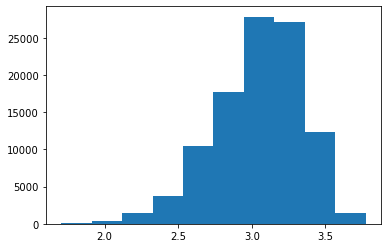

In [128]:
import matplotlib.pyplot as plt
plt.hist(new['Shannon Entropy'])

The above developed histogram shows us the differences in the frequencies of calculated shannon entropy for different values of the AA_Window.

<AxesSubplot:ylabel='Frequency'>

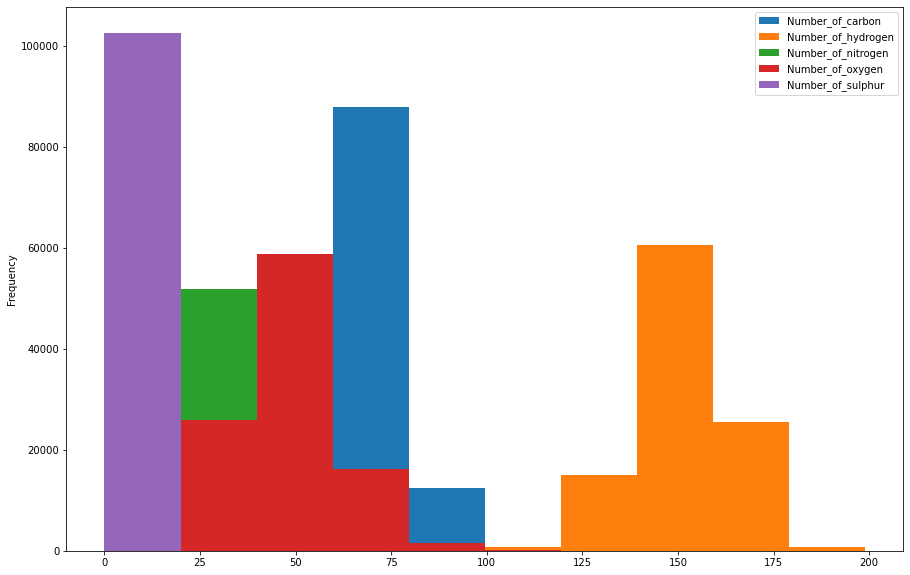

In [129]:
new.plot(x="protein_id", y=["Number_of_carbon", "Number_of_hydrogen","Number_of_nitrogen","Number_of_oxygen","Number_of_sulphur"], kind="hist", figsize=(15, 10))

The above subplot shows the differences in the number of atoms for different chemical compunds.These percentages vary based n the different values or sequences present in the AA_Window.

<AxesSubplot:ylabel='Frequency'>

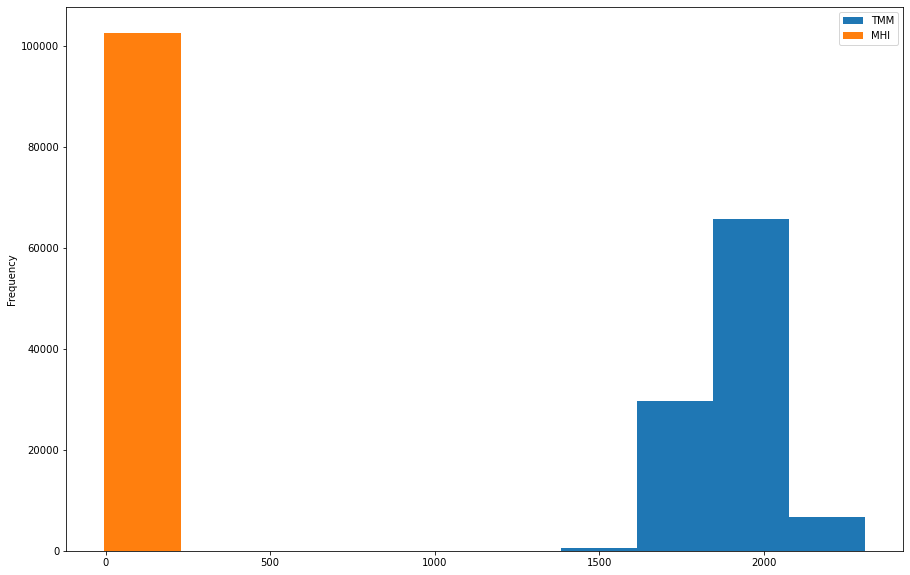

In [130]:
new.plot(x="protein_id", y=['TMM','MHI'], kind="hist", figsize=(15, 10))

# References

1)https://www.geeksforgeeks.org/pandas-tutorial/
2)https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html
3)https://matplotlib.org/stable/index.html
4)https://www.yacinemahdid.com/shannon-entropy-from-theory-to-python/
5)https://scikit-learn.org/stable/modules/linear_model.html
6)https://onestopdataanalysis.com/shannon-entropy/
7)https://pandas.pydata.org/pandas-docs/stable/